In [2]:
# 📦 Import Library
# ============================================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("smartphones_data.csv.csv")

In [4]:
print("=== Jumlah Missing Values Sebelum Imputasi ===")
print(df.isnull().sum())
print("\nTotal data:", len(df))

=== Jumlah Missing Values Sebelum Imputasi ===
brand_name                 0
Name                       0
Price                      0
RAM                        0
OS                         0
storage                    0
Battery_cap                0
has_fast_charging          0
has_fingerprints         726
has_nfc                  726
has_5g                   726
processor_brand            0
num_core                 175
primery_rear_camera        0
Num_Rear_Cameras           0
primery_front_camera       0
num_front_camera           0
display_size(inch)         0
refresh_rate(hz)        1731
display_types              0
dtype: int64

Total data: 3260


In [5]:
num_cols = ['refresh_rate(hz)', 'num_core']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [6]:
cat_cols = ['has_fingerprints', 'has_nfc', 'has_5g']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [7]:
print("\n=== Jumlah Missing Values Setelah Imputasi ===")
print(df.isnull().sum())


=== Jumlah Missing Values Setelah Imputasi ===
brand_name              0
Name                    0
Price                   0
RAM                     0
OS                      0
storage                 0
Battery_cap             0
has_fast_charging       0
has_fingerprints        0
has_nfc                 0
has_5g                  0
processor_brand         0
num_core                0
primery_rear_camera     0
Num_Rear_Cameras        0
primery_front_camera    0
num_front_camera        0
display_size(inch)      0
refresh_rate(hz)        0
display_types           0
dtype: int64


In [8]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

In [9]:
for col in ['Price', 'RAM', 'Battery_cap']:
    df = remove_outliers_iqr(df, col)

C:\Users\Agent\AppData\Local\Temp\ipykernel_13792\2201674000.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_price.values, y=brand_price.index, palette='viridis')


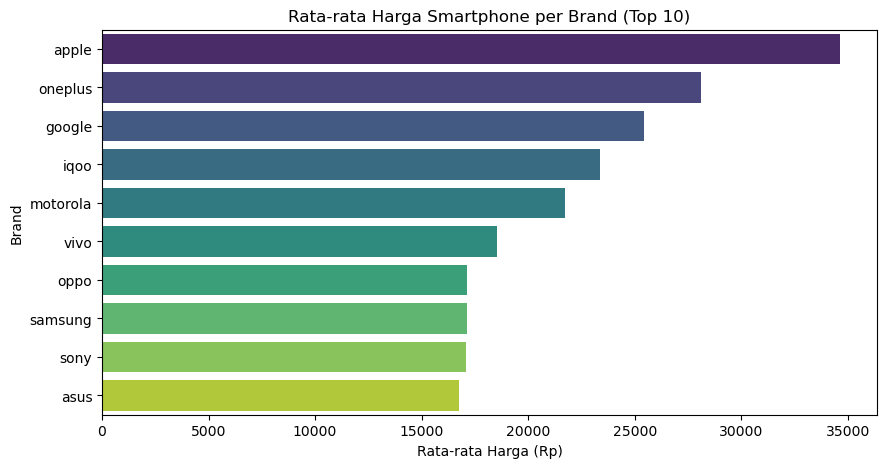

In [10]:
plt.figure(figsize=(10,5))
brand_price = df.groupby('brand_name')['Price'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=brand_price.values, y=brand_price.index, palette='viridis')
plt.title('Rata-rata Harga Smartphone per Brand (Top 10)')
plt.xlabel('Rata-rata Harga (Rp)')
plt.ylabel('Brand')
plt.show()


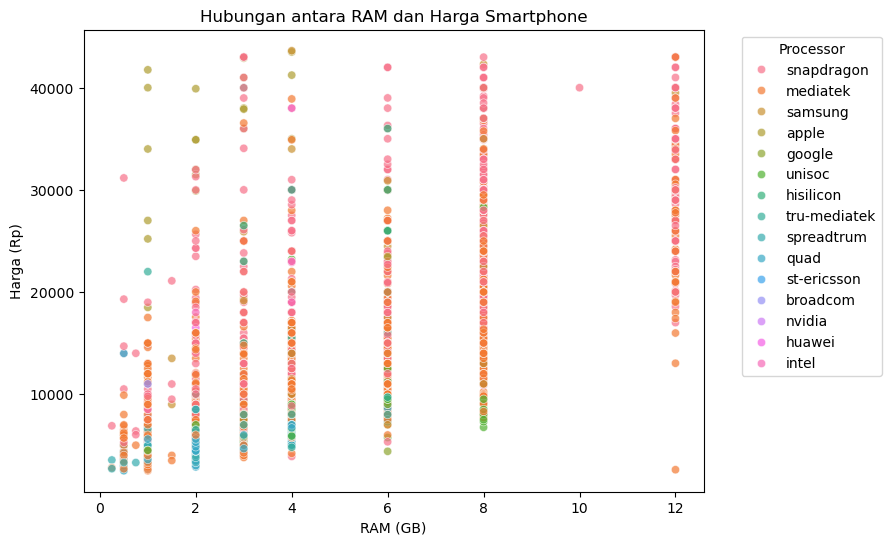

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='RAM', y='Price', hue='processor_brand', alpha=0.7)
plt.title('Hubungan antara RAM dan Harga Smartphone')
plt.xlabel('RAM (GB)')
plt.ylabel('Harga (Rp)')
plt.legend(title='Processor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

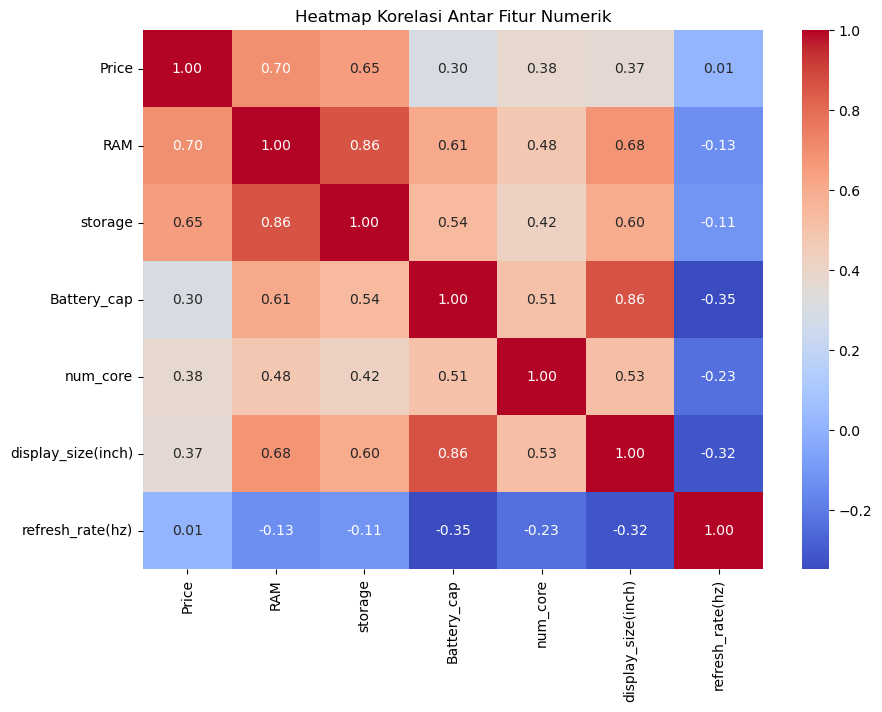

In [12]:
plt.figure(figsize=(10,7))
num_features = ['Price','RAM','storage','Battery_cap','num_core','display_size(inch)','refresh_rate(hz)']
corr = df[num_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.show()

In [13]:
# --- Parametrik: Pearson Correlation (Price vs RAM) ---
from scipy.stats import pearsonr

pearson_coef, p_value = pearsonr(df['Price'], df['RAM'])
print("=== Uji Parametrik: Pearson Correlation ===")
print(f"Korelasi Price vs RAM: r = {pearson_coef:.3f}, p-value = {p_value:.4f}")

if p_value < 0.05:
    print("→ Terdapat hubungan signifikan antara RAM dan Harga.\n")
else:
    print("→ Tidak terdapat hubungan signifikan antara RAM dan Harga.\n")


=== Uji Parametrik: Pearson Correlation ===
Korelasi Price vs RAM: r = 0.696, p-value = 0.0000
→ Terdapat hubungan signifikan antara RAM dan Harga.



In [14]:
from scipy.stats import kruskal
top_processors = df['processor_brand'].value_counts().index[:5]
groups = [df[df['processor_brand'] == p]['Price'] for p in top_processors]

H, p_kw = kruskal(*groups)

print("=== Uji Non-Parametrik: Kruskal-Wallis ===")
print(f"H = {H:.3f}, p-value = {p_kw:.4f}")
if p_kw < 0.05:
    print("→ Terdapat perbedaan signifikan harga berdasarkan jenis prosesor.\n")
else:
    print("→ Tidak ada perbedaan signifikan harga antar prosesor.\n")

=== Uji Non-Parametrik: Kruskal-Wallis ===
H = 744.247, p-value = 0.0000
→ Terdapat perbedaan signifikan harga berdasarkan jenis prosesor.



In [15]:
print("💡 Insight Visualisasi & Analisis:")
print("1️⃣ Brand seperti Samsung & Apple memiliki rata-rata harga tertinggi.")
print("2️⃣ RAM memiliki korelasi positif kuat dengan harga smartphone.")
print("3️⃣ Fitur numerik seperti storage dan battery juga berpengaruh moderat terhadap harga.")
print("4️⃣ Terdapat perbedaan signifikan harga antar jenis prosesor (Snapdragon, MediaTek, dll).")

💡 Insight Visualisasi & Analisis:
1️⃣ Brand seperti Samsung & Apple memiliki rata-rata harga tertinggi.
2️⃣ RAM memiliki korelasi positif kuat dengan harga smartphone.
3️⃣ Fitur numerik seperti storage dan battery juga berpengaruh moderat terhadap harga.
4️⃣ Terdapat perbedaan signifikan harga antar jenis prosesor (Snapdragon, MediaTek, dll).
